# Import 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")

sns.set(style='white', context='notebook', palette='deep')

In [2]:
df = pd.read_csv('df-BillBoard.csv')

In [24]:
df = pd.read_csv('../assets/song_data.csv')

In [25]:
billboard = pd.read_csv("HotSongsBillBoard.csv")

# moudles

In [29]:
# this funcation will see if the song name is in billboard and in df, if so it will have 1 as
#1 mean the song is hit 0 mean the song is not hit 
bb_tracks = list(billboard.track)

def find_target(row):
    lst = bb_tracks
    if row['song_name'] in lst:
        return 1
    else:
        return 0

In [30]:
#here we are creating new coulmn to but our value for the funcation above 

df['bbhot'] = df.apply(find_target, axis=1)

In [32]:
#count how many 0 and 1 we have 
df['bbhot'].value_counts()

0    14082
1     4753
Name: bbhot, dtype: int64

In [35]:
df.head()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,bbhot
0,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474,0
1,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370,1
2,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324,1
3,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198,1
4,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574,1


In [34]:
#drop unwanted column 
df.drop(columns=['song_name'],inplace=True)

In [37]:
X = df.drop(['bbhot'],axis=1)

In [38]:
X_train= df.drop(['bbhot'],axis=1)
y_train= df['bbhot']

In [39]:
X_test =df.drop(['bbhot'],axis=1)

In [40]:
scaler = StandardScaler()
_x = scaler.fit(X_train)

_tx = scaler.fit(X_test)


In [41]:
X_train_scaled = pd.DataFrame(_x.transform(X_train),columns=X_train.columns)

In [42]:
X_test_scaled = pd.DataFrame(_tx.transform(X_test),columns=X_test.columns)

In [43]:
knn_model= KNeighborsClassifier()

knn_model.fit(X_train_scaled,y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [44]:
knn_model.score(X_train_scaled,y_train)

0.8361560923812053

In [46]:
random_state = 101

model_names = ['LogisticRegression', 'DecisionTreeClassifier', 'SVC', 
              'RandomForestClassifier', 'XGBClassifier', 'ExtraTreesClassifier'
              , 'GradientBoostingClassifier','AdaBoostClassifier','GaussianNB','SVM']
models = [ ('LogisticRegression',LogisticRegression(random_state=random_state)),
          ('DecisionTreeClassifier', DecisionTreeClassifier(random_state=random_state)),
           ('SVC', SVC(random_state=random_state)),
          ('RandomForestClassifier',RandomForestClassifier(random_state=42)),
          ('ExtraTreesClassifier',ExtraTreesClassifier(random_state=random_state)),
          ('GradientBoostingClassifier',GradientBoostingClassifier(random_state=random_state)),
          ('AdaBoostClassifier',AdaBoostClassifier(random_state=random_state)),
          ('GaussianNB',GaussianNB()),
          ('SVM ',svm.SVC())
         ]
model_accuracy = []
counter = 0
for m,model in models:
    print (m , ':')
    model.fit(X_train_scaled, y_train)
    accuracy = cross_val_score(model, X_train_scaled, y_train, cv=5).mean()
    model_accuracy.append(accuracy)
    print(accuracy)
    print('\n')

LogisticRegression :
0.7477037710926732


DecisionTreeClassifier :
0.7461158399294068


SVC :
0.7495618869648026


RandomForestClassifier :
0.8221425269379908


ExtraTreesClassifier :
0.8289904498559204


GradientBoostingClassifier :
0.7614547673206108


AdaBoostClassifier :
0.7514209471260499


GaussianNB :
0.5774309775546473


SVM  :
0.7495618869648026




In [47]:
kfold = StratifiedKFold(n_splits=10)

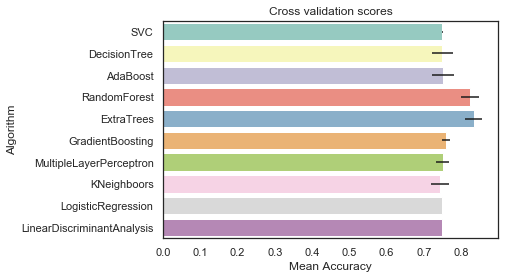

In [48]:
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train_scaled, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [55]:
cv_res 

,CrossValMeans,CrossValerrors,Algorithm
0,0.749615,0.001467,SVC
1,0.749568,0.028218,DecisionTree
2,0.751108,0.028348,AdaBoost
3,0.823895,0.024837,RandomForest
4,0.833081,0.022686,ExtraTrees
5,0.758218,0.011071,GradientBoosting
6,0.750358,0.017449,MultipleLayerPerceptron
7,0.742717,0.024499,KNeighboors
8,0.747651,0.000303,LogisticRegression
9,0.747598,0.000254,LinearDiscriminantAnalysis


In [49]:
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(X_train_scaled,y_train)

ada_best = gsadaDTC.best_estimator_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 281 tasks      | elapsed:    9.7s
[Parallel(n_jobs=4)]: Done 839 tasks      | elapsed:   35.4s
[Parallel(n_jobs=4)]: Done 1113 out of 1120 | elapsed:   50.7s remaining:    0.2s
[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:   50.7s finished


In [50]:
gsadaDTC.best_score_

0.7530130076984337

In [51]:
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [None],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(X_train_scaled,y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 180 out of 180 | elapsed:  5.8min finished


0.8348287762144943

In [52]:
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [None],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs=4, verbose = 1)

gsRFC.fit(X_train_scaled,y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  8.2min
[Parallel(n_jobs=4)]: Done 180 out of 180 | elapsed: 26.9min finished


0.7559331032651978

In [53]:
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [2,3,4,8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train_scaled,y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   16.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  3.2min
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:  5.4min finished


0.801221130873374

In [54]:
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gsSVMC.fit(X_train_scaled,y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 98.5min
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed: 235.0min finished


0.830050438014335